在世界各地，有众多的电信公司。为了保持竞争并扩大业务客户，必须在市场上进行投资。但是，由于竞争加剧，公司面临严重的收入损失和潜在客户的流失。因此，客户希望通过衡量客户忠诚度来重新获得失去的客户，从而找出失去客户的原因。

In [664]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# 一.导入数据

In [627]:
telecom=pd.read_csv(r'WA_Fn-UseC_-Telco-Customer-Churn.csv')
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [628]:
telecom.shape

(7043, 21)

In [629]:
telecom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [630]:
telecom['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# 二.数据清洗

In [631]:
#查找空值
telecom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [632]:
#查找重复值
telecom.duplicated().sum()

0

In [633]:
#查看数据类型
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [634]:
#TotalCharges为总费用，应为float
telecom['TotalCharges']=pd.to_numeric(telecom['TotalCharges'],errors='coerce')
telecom.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [635]:
#检查空值
telecom['TotalCharges'].isnull().sum()

11

In [636]:
telecom.dropna(inplace=True)
telecom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [637]:
#客户流失数据归一化,1代表流失,0代表未流失
telecom['Churn'].replace('Yes',1,inplace=True)
telecom['Churn'].replace('No',0,inplace=True)
telecom['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

# 三.数据可视化分析

In [638]:
telecom['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [673]:
#设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']

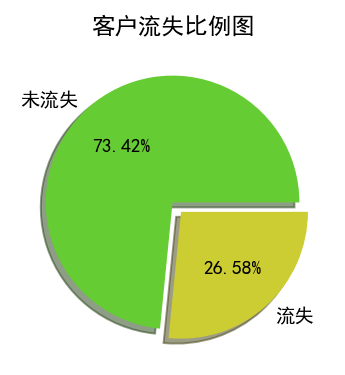

In [640]:
fig,axes=plt.subplots(1,dpi=140,figsize=(3,3))
plt.pie(telecom['Churn'].value_counts(),labels=['未流失','流失'],colors=['#66cc33','#cccc33'],explode=(0,0.1),autopct='%0.2f%%',shadow=True)
plt.title('客户流失比例图')
plt.show()

### 结论1：客户流失占总客户数量比例26.58%

## 3.1用户个人特征分析

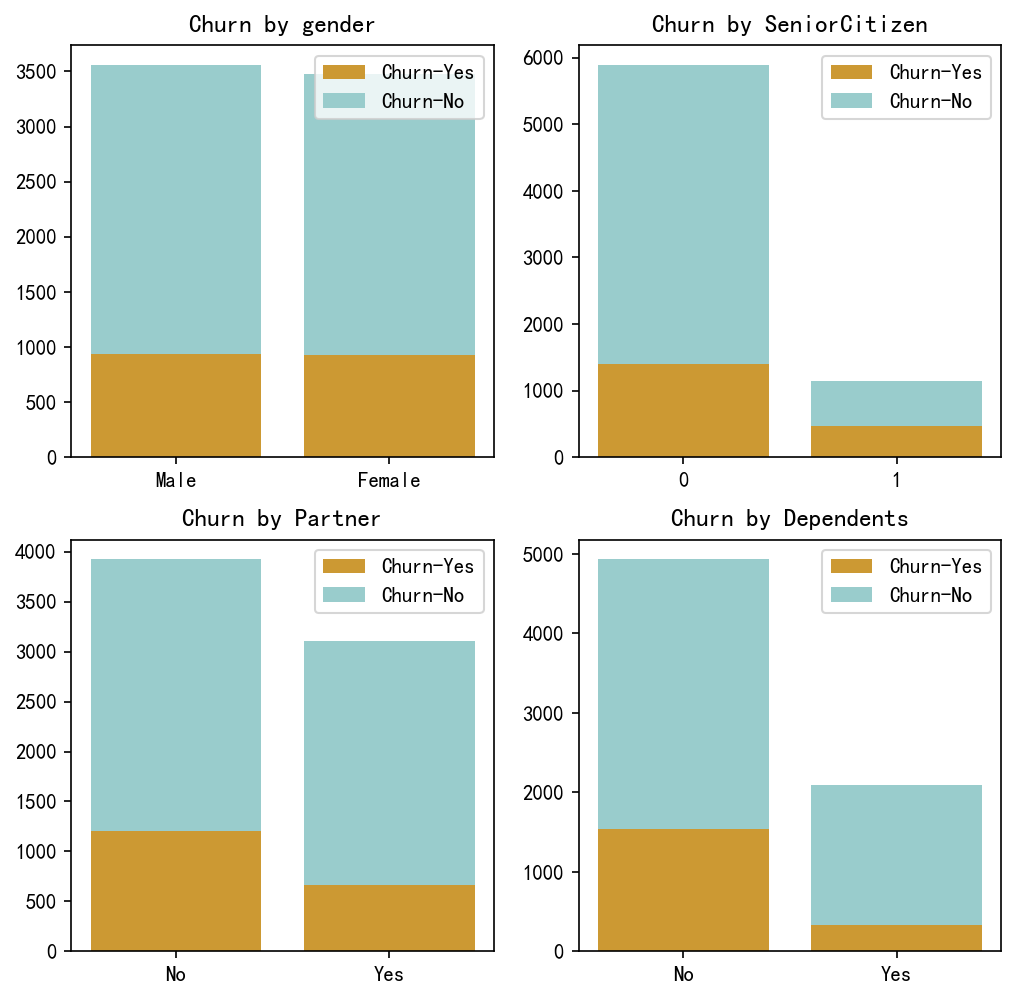

In [769]:
#分析客户gender，SeniorCitizen，Partner，Dependents对客户流失的影响
fig,axes=plt.subplots(2,2,dpi=150,figsize=(8,8))

#设置叠加柱状图高度
def autolabel(rects1, rects2):
    i = 0
    for rect1 in rects1:
        rect2 = rects2[i]
        i += 1
        height = rect1.get_height() + rect2.get_height()
        
varlist=['gender','SeniorCitizen','Partner','Dependents']
for i in range(0,4):
    plt.subplot(2,2,i+1)
    gender_list = telecom[telecom['Churn']==1][varlist[i]].value_counts()
    gender_list2 = telecom[telecom['Churn']==0][varlist[i]].value_counts()
    z1 = plt.bar(range(len(gender_list)), 
                  gender_list, 
                  label='Churn-Yes',
                  color='#CC9933')
    z2 = plt.bar(range(len(gender_list)), 
                  gender_list2, 
                  bottom=gender_list, 
                  label='Churn-No', 
                  tick_label=telecom[telecom['Churn']==1][varlist[i]].unique().tolist(),
                  color='#99CCCC')
    autolabel(z1, z2)
    plt.title(f'Churn by {varlist[i]}')
    plt.legend()
plt.show()

### 结论2:客户流失与性别情况几乎无差异
### 结论3:老年人中客户流失占比明显高于非老年人,但非老年人客户流失数量更多
### 结论4:已婚和未婚客户流失所占比重几乎无差异,但未婚客户流失远大于已婚客户流失数量
### 结论5:经济未独立客户流失数量及占比均远大于经济独立客户

## 3.2电信服务特征分析

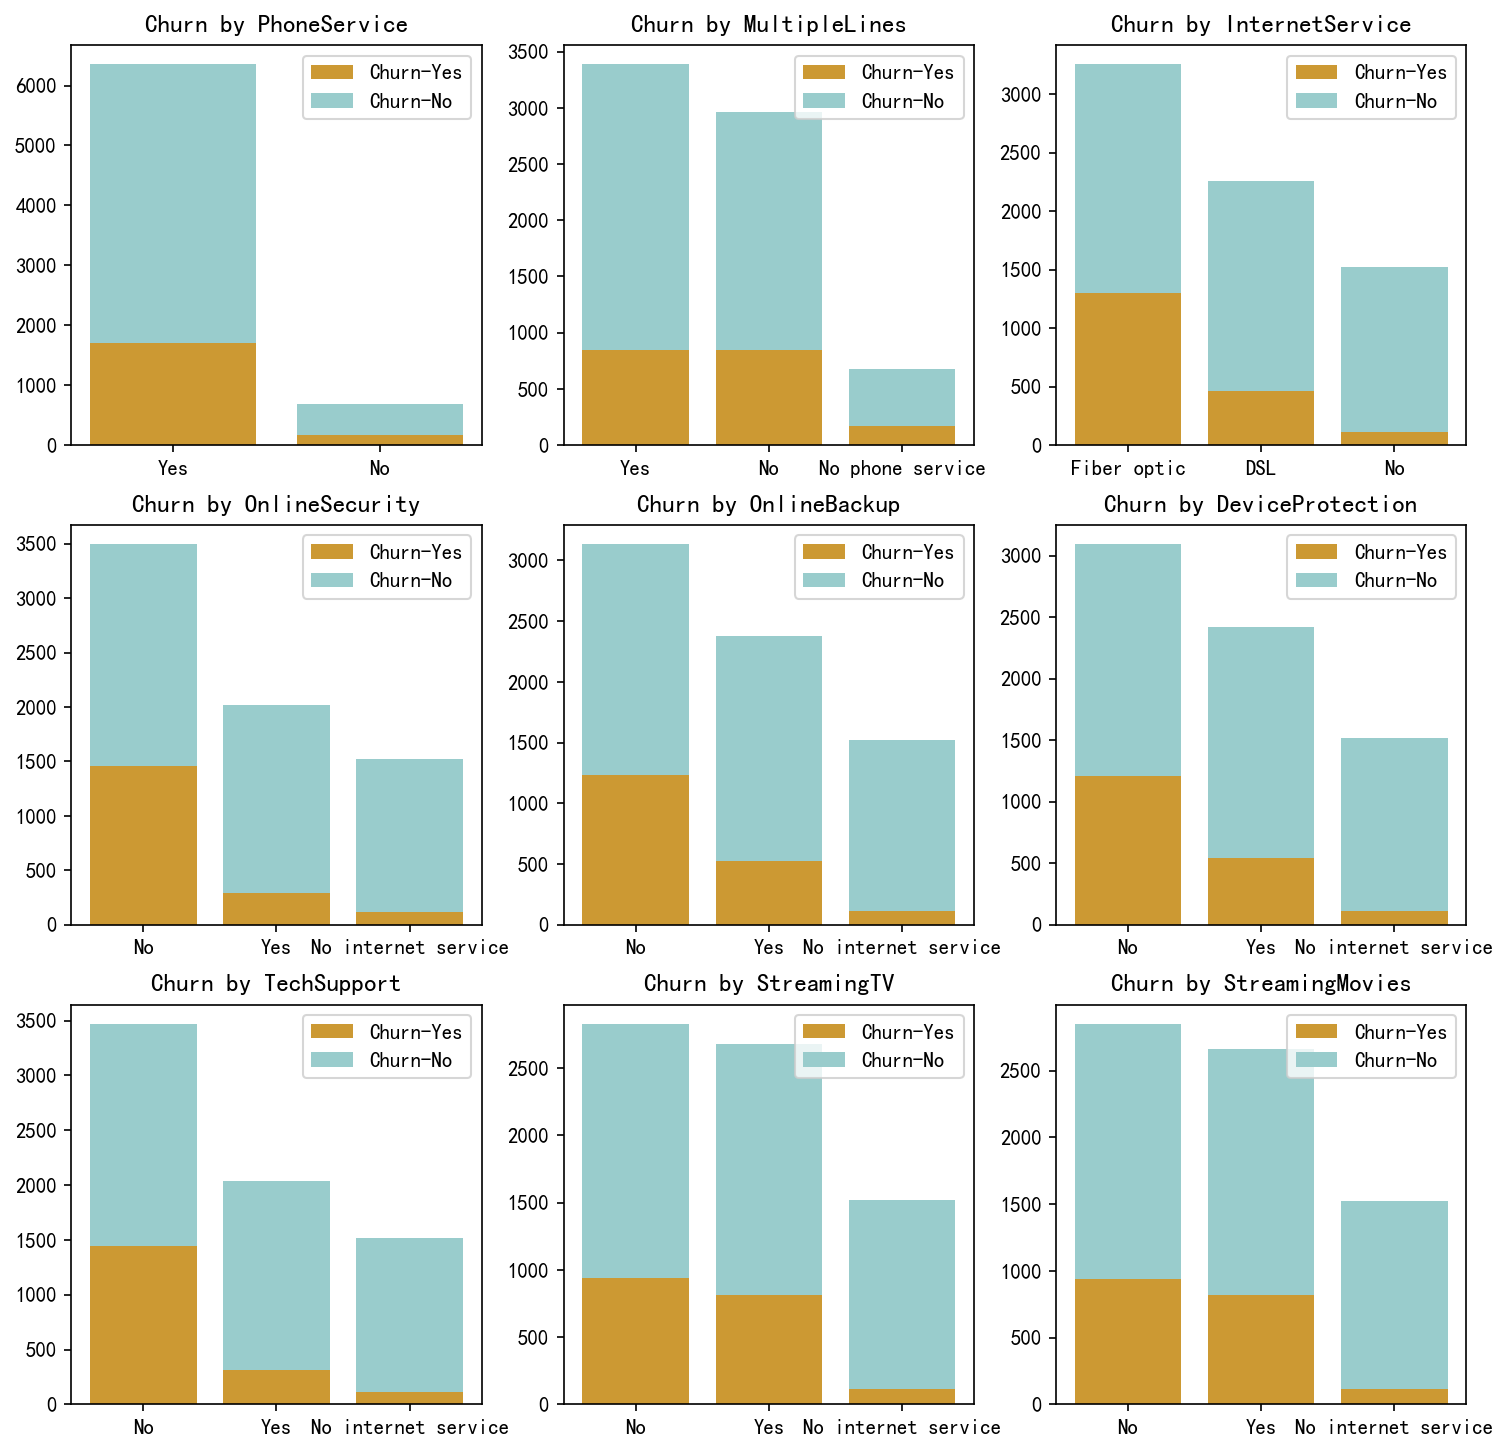

In [770]:
#分析'PhoneService','MultipleLines','InternetService',
#    'OnlineSecurity','OnlineBackup','DeviceProtection',
#    'TechSupport','StreamingTV','StreamingMovies'
#电信业务对客户流失的影响
fig,axes=plt.subplots(3,3,dpi=150,figsize=(12,12))
        
varlist=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in range(0,9):
    plt.subplot(3,3,i+1)
    gender_list = telecom[telecom['Churn']==1][varlist[i]].value_counts()
    gender_list2 = telecom[telecom['Churn']==0][varlist[i]].value_counts()
    z1 = plt.bar(range(len(gender_list)), 
                  gender_list, 
                  label='Churn-Yes',
                  color='#CC9933')
    z2 = plt.bar(range(len(gender_list)), 
                  gender_list2, 
                  bottom=gender_list, 
                  label='Churn-No', 
                  tick_label=telecom[telecom['Churn']==1][varlist[i]].value_counts().sort_values(ascending=False).index.tolist(),
                  color='#99CCCC')
    autolabel(z1, z2)
    plt.title(f'Churn by {varlist[i]}')
    plt.legend()
plt.show()

### 结论6:电话服务业务,多线业务,网络电视业务,网络电影业务对客户流失影响不大

### 结论7:互联网服务中选择fiber optic光纤网络的客户流失最严重

### 结论8:未开通网络安全服务,在线备份服务,设备保护业务,技术支持服务的客户流失严重

## 3.3合同及账单支付特征分析

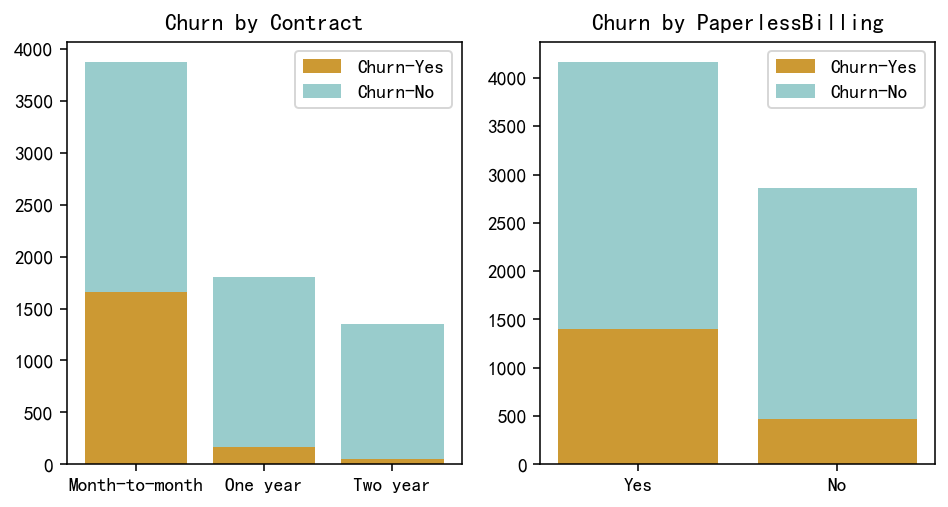

In [771]:
# 分析合同Contract,是否开通电子账单PaperlessBilling对客户流失影响
fig,axes=plt.subplots(1,2,dpi=140,figsize=(8,4))      
varlist=['Contract','PaperlessBilling']
for i in range(0,2):
    plt.subplot(1,2,i+1)
    gender_list = telecom[telecom['Churn']==1][varlist[i]].value_counts()
    gender_list2 = telecom[telecom['Churn']==0][varlist[i]].value_counts()
    z1 = plt.bar(range(len(gender_list)), 
                  gender_list, 
                  label='Churn-Yes',
                  color='#CC9933')
    z2 = plt.bar(range(len(gender_list)), 
                  gender_list2, 
                  bottom=gender_list, 
                  label='Churn-No', 
                  tick_label=telecom[telecom['Churn']==1][varlist[i]].value_counts().sort_values(ascending=False).index.tolist(),
                  color='#99CCCC')
    autolabel(z1, z2)
    plt.title(f'Churn by {varlist[i]}')
    plt.legend()
plt.show()

### 结论9:开通月付的客户流失非常严重

### 结论10:开通电子账单的客户流失比未开通的严重

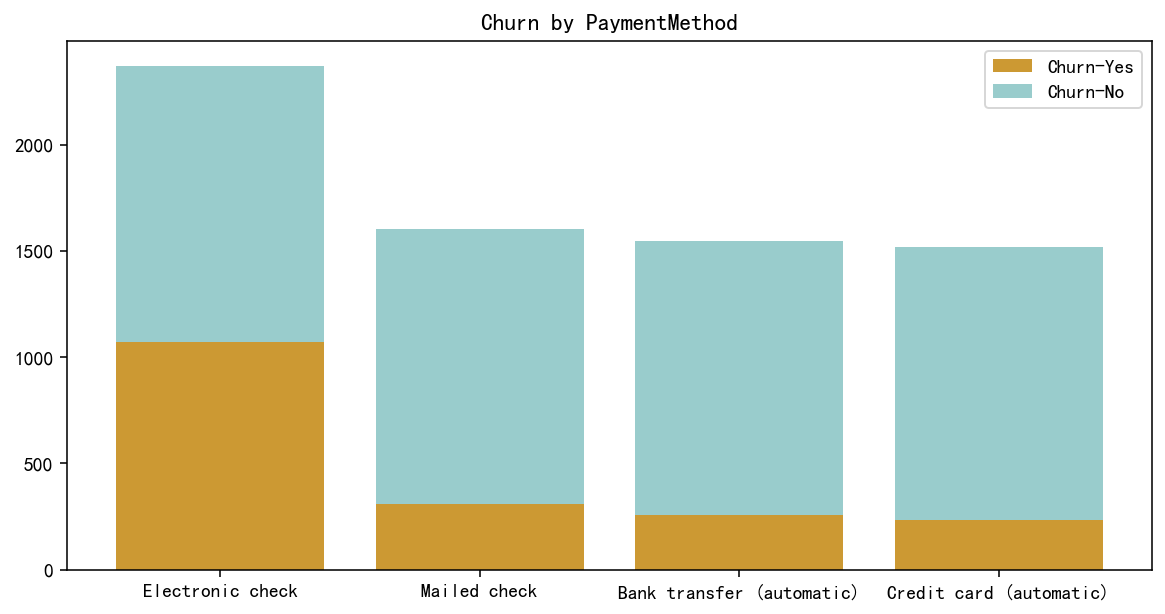

In [768]:
# 分析支付方式PaymentMethod对客户流失影响
fig,axes=plt.subplots(1,1,dpi=140,figsize=(10,5))
gender_list = telecom[telecom['Churn']==1]['PaymentMethod'].value_counts()
gender_list2 = telecom[telecom['Churn']==0]['PaymentMethod'].value_counts()
z1 = plt.bar(range(len(gender_list)),
             gender_list, label='Churn-Yes',
             color='#CC9933')
z2 = plt.bar(range(len(gender_list)), 
             gender_list2, 
             bottom=gender_list, 
             label='Churn-No', 
             tick_label=telecom[telecom['Churn']==1]['PaymentMethod'].value_counts().sort_values(ascending=False).index.tolist(),
             color='#99CCCC')
autolabel(z1, z2)
plt.title('Churn by PaymentMethod')
plt.legend()
plt.show()

### 结论11:使用电子支票的客户流失最为严重,其他支付方式并无差异

## 3.4用户职业特征分析

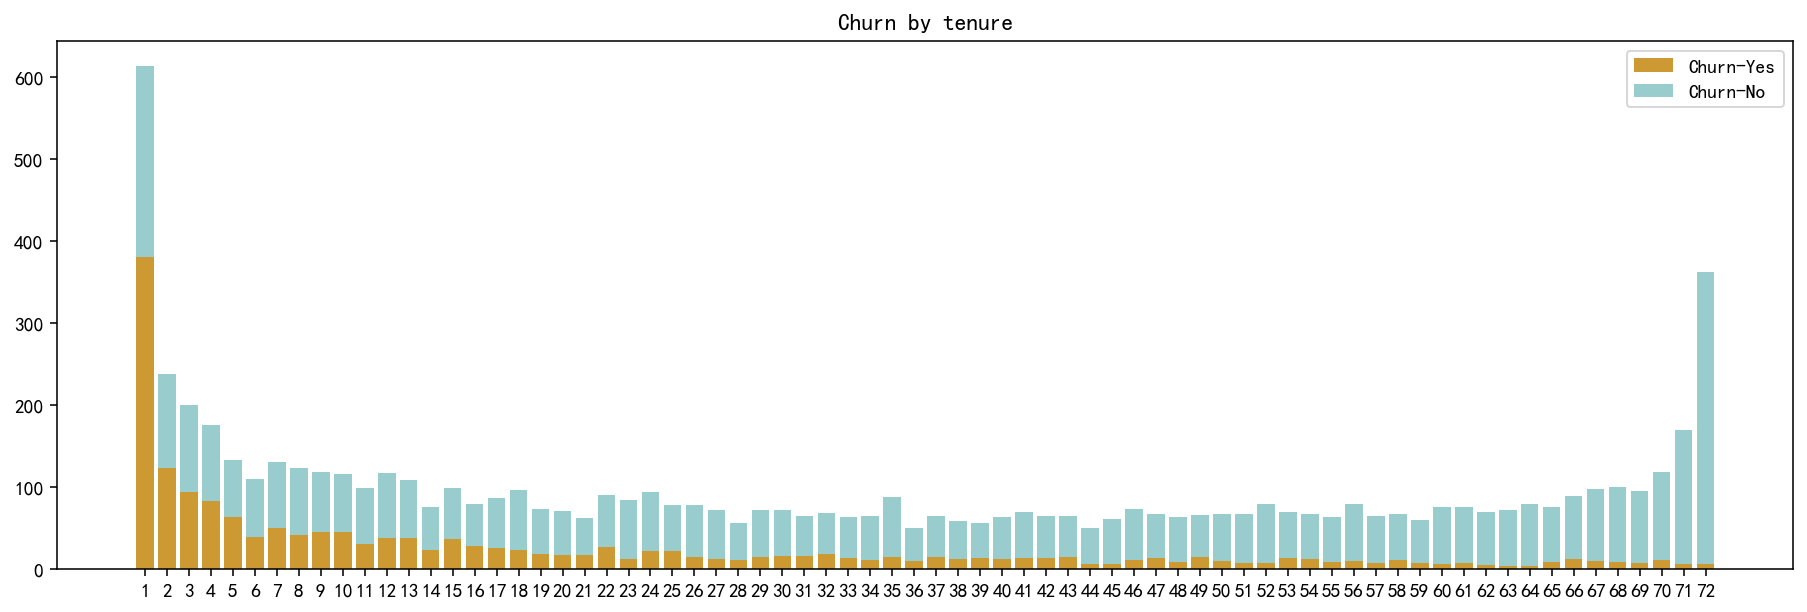

In [772]:
#分析职业与客户流失
fig,axes=plt.subplots(1,1,dpi=140,figsize=(16,5))
gender_list = np.array(telecom[telecom['Churn']==1]['tenure'].value_counts().sort_index().tolist())
gender_list2 = np.array(telecom[telecom['Churn']==0]['tenure'].value_counts().sort_index().tolist())
z1 = plt.bar(range(len(gender_list)),
             gender_list, label='Churn-Yes',
             color='#CC9933')
z2 = plt.bar(range(len(gender_list)), 
             gender_list2, 
             bottom=gender_list, 
             label='Churn-No', 
             tick_label=telecom[telecom['Churn']==1]['tenure'].value_counts().sort_index().index.tolist(),
             color='#99CCCC')
autolabel(z1, z2)
plt.title('Churn by tenure')
plt.legend()
plt.show()

### 结论12:1职业客户流失最为严重,其次为2,3,4,5职业

## 3.5消费特征分析

In [646]:
# 分析MonthlyCharges与TotalCharges对客户流失影响
telecom_charges=telecom.loc[:,'MonthlyCharges':'Churn'].copy()

In [647]:
telecom_charges.head()

,MonthlyCharges,TotalCharges,Churn
0,29.85,29.85,0
1,56.95,1889.50,0
2,53.85,108.15,1
3,42.30,1840.75,0
4,70.70,151.65,1


In [648]:
telecom_charges['MonthlyCharges'].max()

118.75

In [649]:
telecom_charges['MonthlyCharges'].min()

18.25

In [650]:
bin_ar1=np.linspace(18,120,11)
bin_ar1=np.round(bin_ar1,2)
bin_ar1

array([ 18. ,  28.2,  38.4,  48.6,  58.8,  69. ,  79.2,  89.4,  99.6,
       109.8, 120. ])

In [651]:
#面元划分
cut1=pd.cut(np.array(telecom_charges['MonthlyCharges']),bin_ar1)
# pd.Series(cut1.codes).value_counts(ascending=True)
# cut1.categories

In [652]:
telecom_charges['MonthlyCharges']=pd.Series(cut1)

In [653]:
telecom_charges.head()

,MonthlyCharges,TotalCharges,Churn
0,"(28.2, 38.4]",29.85,0
1,"(48.6, 58.8]",1889.50,0
2,"(48.6, 58.8]",108.15,1
3,"(38.4, 48.6]",1840.75,0
4,"(69.0, 79.2]",151.65,1


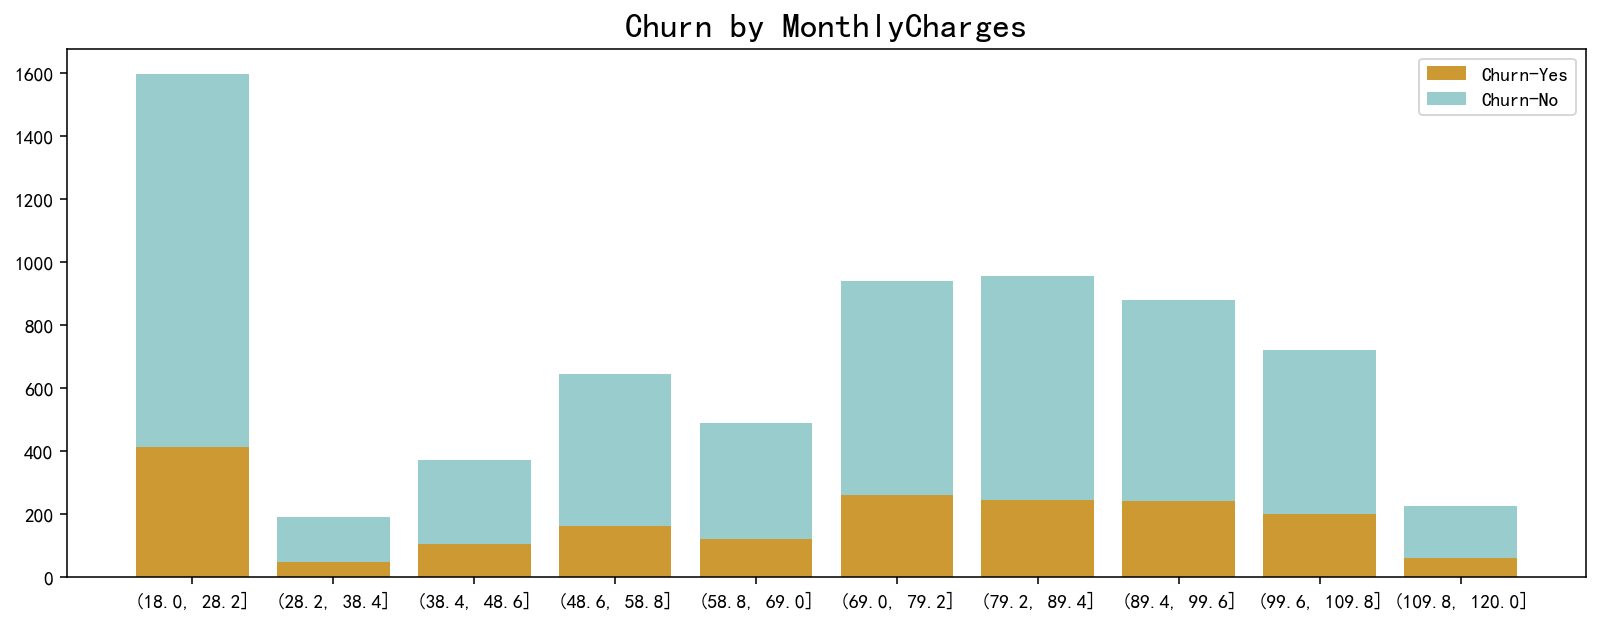

In [773]:
fig,axes=plt.subplots(1,1,dpi=140,figsize=(14,5))
gender_list =np.array(telecom_charges[telecom_charges['Churn']==1]['MonthlyCharges'].value_counts().sort_index())
gender_list2 =np.array(telecom_charges[telecom_charges['Churn']==0]['MonthlyCharges'].value_counts().sort_index())
z1 = plt.bar(range(len(gender_list)),
             gender_list, label='Churn-Yes',
             color='#CC9933')
z2 = plt.bar(range(len(gender_list)), 
             gender_list2, 
             bottom=gender_list, 
             label='Churn-No', 
             tick_label=telecom_charges[telecom_charges['Churn']==1]['MonthlyCharges'].value_counts().sort_index().index.tolist(),
             color='#99CCCC')
autolabel(z1, z2)
plt.title('Churn by MonthlyCharges',fontsize=18)
plt.legend()
plt.show()

### 结论13:月费用处于(18.0,28.2]的客户数量最多,也是客户流失最多的区间

In [655]:
telecom_charges['TotalCharges'].max()

8684.8

In [656]:
telecom_charges['TotalCharges'].min()

18.8

In [657]:
bin_ar2=np.linspace(18,8685,16)
bin_ar2=np.round(bin_ar2)
bin_ar2

array([  18.,  596., 1174., 1751., 2329., 2907., 3485., 4063., 4640.,
       5218., 5796., 6374., 6952., 7529., 8107., 8685.])

In [658]:
cut2=pd.cut(np.array(telecom_charges['TotalCharges']),bin_ar2)
telecom_charges['TotalCharges']=pd.Series(cut2)
telecom_charges.head()

,MonthlyCharges,TotalCharges,Churn
0,"(28.2, 38.4]","(18.0, 596.0]",0
1,"(48.6, 58.8]","(1751.0, 2329.0]",0
2,"(48.6, 58.8]","(18.0, 596.0]",1
3,"(38.4, 48.6]","(1751.0, 2329.0]",0
4,"(69.0, 79.2]","(18.0, 596.0]",1


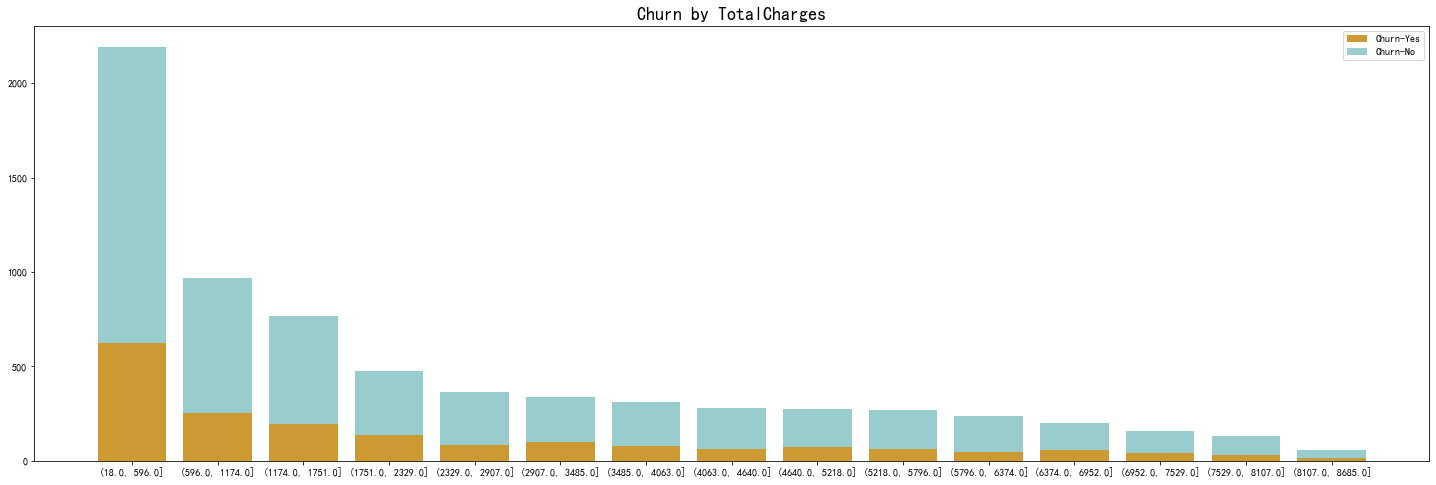

In [774]:
fig,axes=plt.subplots(1,1,figsize=(25,8))
gender_list =np.array(telecom_charges[telecom_charges['Churn']==1]['TotalCharges'].value_counts().sort_index())
gender_list2 =np.array(telecom_charges[telecom_charges['Churn']==0]['TotalCharges'].value_counts().sort_index())
z1 = plt.bar(range(len(gender_list)),
             gender_list, label='Churn-Yes',
             color='#CC9933')
z2 = plt.bar(range(len(gender_list)), 
             gender_list2, 
             bottom=gender_list, 
             label='Churn-No', 
             tick_label=telecom_charges[telecom_charges['Churn']==1]['TotalCharges'].value_counts().sort_index().index.tolist(),
             color='#99CCCC')
autolabel(z1, z2)
plt.title('Churn by TotalCharges',fontsize=18)
plt.legend()
plt.show()

### 结论14:总消费在(18.0,596.0]区间的用户最多,用户流失也最多

# 四.构建模型

In [660]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [662]:
# customerID 对模型预测无用,可以删除
telecom_new=telecom.loc[:,'gender':'Churn'].copy()
telecom_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [668]:
# 对客户的职业,月消费,总消费数据标准化,使预测结果不被过大或过小的特征值影响
scaler=StandardScaler(copy=False)
scaler.fit_transform(telecom_new[['tenure','MonthlyCharges','TotalCharges']])

array([[-1.28024804, -1.16169394, -0.99419409],
       [ 0.06430269, -0.26087792, -0.17373982],
       [-1.23950408, -0.36392329, -0.95964911],
       ...,
       [-0.87280842, -1.17000405, -0.85451414],
       [-1.15801615,  0.31916782, -0.87209546],
       [ 1.36810945,  1.35793167,  2.01234407]])

In [670]:
telecom_new[['tenure','MonthlyCharges','TotalCharges']]=scaler.transform(telecom_new[['tenure','MonthlyCharges','TotalCharges']])
telecom_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,-1.280248,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.161694,-0.994194,0
1,Male,0,No,No,0.064303,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.260878,-0.173740,0
2,Male,0,No,No,-1.239504,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.363923,-0.959649,1
3,Male,0,No,No,0.512486,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.747850,-0.195248,0
4,Female,0,No,No,-1.239504,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.196178,-0.940457,1


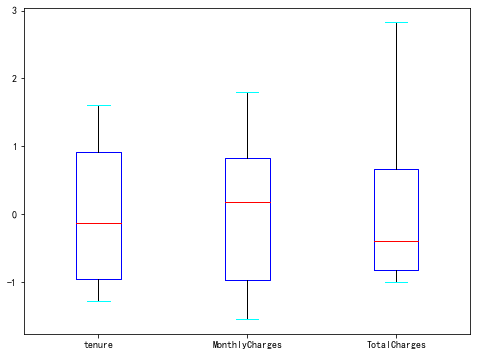

In [778]:
# 使用箱型图检查异常值
fig,axes=plt.subplots(figsize=(8,6))
plt.rcParams['axes.unicode_minus'] =False #显示负号
plt.boxplot([telecom_new['tenure'],telecom_new['MonthlyCharges'],telecom_new['TotalCharges']],
            labels=['tenure','MonthlyCharges','TotalCharges'],
            notch=False,
            medianprops={'color':'red'},
            boxprops=dict(color="blue"), 
            whiskerprops = {'color': "black"},
            capprops = {'color': "cyan"},
            flierprops={'color':'purple','markeredgecolor':"purple"})
plt.show()

In [696]:
#无异常值后处理对象类型的字段进行标签标准化处理
telecom_object=telecom_new.select_dtypes(['object'])
for i in range(0,len(telecom_object.columns)):
    telecom_new[telecom_object.columns[i]]=LabelEncoder().fit_transform(telecom_new[telecom_object.columns[i]])
telecom_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,1,0,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740,0
2,1,0,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649,1
3,1,0,0,0,0.512486,0,1,0,2,0,2,2,0,0,1,0,0,-0.747850,-0.195248,0
4,0,0,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457,1


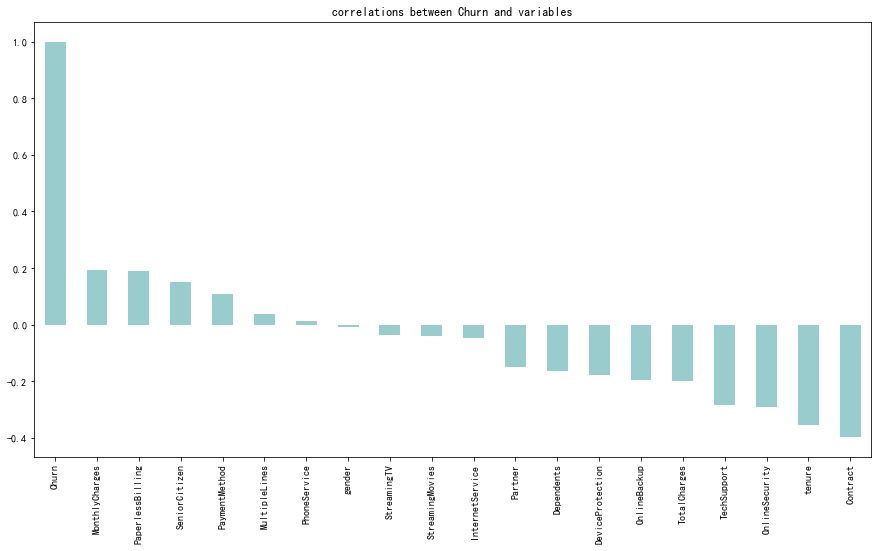

In [781]:
#查看各项特征与客户流失的相关系数
plt.figure(figsize=(15,8))
telecom_new.corr()['Churn'].sort_values(ascending=False).plot(kind='bar',color='#99CCCC')
plt.title('correlations between Churn and variables')
plt.show()

In [700]:
#并没有发现与Churn相关性很强的特征,并且Phoneservice与gender几乎为0 ,对预测影响非常小,可以舍弃

In [703]:
telecom_data=telecom_new.drop(['gender','PhoneService'],axis=1)
telecom_data.shape

(7032, 18)

In [730]:
#使用分类算法创建模型

In [705]:
#采用逻辑回归模型进行预测
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [723]:
x_train, x_test, y_train, y_test=train_test_split(telecom_data.loc[:,:'TotalCharges'],telecom_data.loc[:,'Churn'],test_size=0.2,random_state=None)
lr2=LogisticRegression().fit(x_train,y_train)
lr2.intercept_,lr2.coef_

(array([-1.1041203]),
 array([[ 0.30833773,  0.03026334, -0.24166601, -1.39999225,  0.1330227 ,
          0.05896585, -0.28846346, -0.13593111, -0.07062517, -0.27276874,
          0.03252313,  0.02759506, -0.73764078,  0.40086016,  0.06461043,
          0.46286788,  0.69449653]]))

In [724]:
lr2.score(x_train,y_train),lr2.score(x_test,y_test)

(0.8021333333333334, 0.8017057569296375)

In [725]:
#采用决策树进行预测
from sklearn.tree import DecisionTreeClassifier  

In [726]:
dtc=DecisionTreeClassifier().fit(x_train,y_train)
dtc.score(x_train,y_train),dtc.score(x_test,y_test)

(0.9971555555555556, 0.7491115849324804)

In [727]:
#使用随机森林
from sklearn.ensemble import RandomForestClassifier

In [728]:
rfc=RandomForestClassifier().fit(x_train,y_train)
rfc.score(x_train,y_train),rfc.score(x_test,y_test)

(0.9800888888888889, 0.7953091684434968)

In [ ]:
# 使用多层感知机神经网络
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import os
os.environ['KERAS_BACKEND']='tensorflow'

dataset=np.loadtxt('telecom_data.csv',delimiter=',',encoding='utf-8')
x=dataset[:,:17]
y=dataset[:,17]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=True)
model=Sequential()
model.add(Dense(17,input_dim=17,activation='relu'))
model.add(Dense(17,activation='softmax'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x,y,epochs=1000,validation_split=0.2,batch_size=20,validation_data=(X_test,y_test))
score=model.evaluate(x,y)
print('%s:%f%%'%(model.metrics_names[1],score[1]*100))
print('%s:%f'%(model.metrics_names[0],score[0]))
res=model.predict(x[0:10])
print(np.round(res).reshape(10,),'\n',y[0:10])
'''
accuracy:86.959612%
loss:0.309488
[0. 0. 1. 0. 1. 1. 0. 0. 1. 0.] 
 [0. 0. 1. 0. 1. 1. 0. 0. 1. 0.]
'''

## 由于考虑模型的泛化性能及预测准确度,这里可以采用逻辑回归进行预测,预测得分为80%

# 五.总结:

### 1.老年用户与未婚且经济未独立的青少年用户更容易流失。
### 2.电话服务对用户的流失没有直接的影响。
### 3.提供的各项网络服务项目能够降低用户的流失率,但互联网服务中使用光纤网络的客户流失严重
### 4.签订合同越久，用户的留存率越高。
### 5.采用电子支票,账单月付的客户更易流失
### 6.月消费与总消费中客户流失最多的均处于消费价格最低区间
### 7.可以采用逻辑回归模型对客户是否流失进行预测,预测得分为80.17%

In [732]:
telecom_data.to_csv('telecom_data.csv')